## Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("framingham.csv")
df.sample(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3852,0,62,1.0,0,0.0,0.0,0,0,0,242.0,137.0,75.0,30.51,60.0,78.0,0
1113,0,66,2.0,0,0.0,0.0,0,1,0,238.0,140.0,80.0,26.69,69.0,83.0,0
196,1,48,1.0,1,10.0,0.0,0,0,0,308.0,117.0,76.0,30.85,65.0,54.0,1
1517,0,56,3.0,0,0.0,0.0,0,0,0,248.0,112.5,60.0,22.69,75.0,92.0,0
3580,0,65,1.0,1,3.0,0.0,0,0,0,217.0,169.0,111.0,32.54,65.0,78.0,0


In [ ]:
df.shape

(4240, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
df.drop(['education'],axis= 1 , inplace= True)

In [ ]:
cols_to_convert= ["cigsPerDay", "BPMeds"]
df[cols_to_convert]= df[cols_to_convert].astype('Int64')

## Handling the null values in our dataset

In [ ]:
df.isna().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50
sysBP,0


In [ ]:
df['cigsPerDay'].fillna(0, inplace= True)
df['BPMeds'].fillna(0, inplace= True)

/tmp/ipython-input-698711270.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cigsPerDay'].fillna(0, inplace= True)
/tmp/ipython-input-698711270.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [ ]:
df['glucose'].fillna(df['glucose'].quantile(), inplace= True)
df['totChol'].fillna(df['totChol'].quantile(), inplace= True)

/tmp/ipython-input-4046474857.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['totChol'].fillna(df['totChol'].quantile(), inplace= True)


In [ ]:
df.dropna(inplace= True)

In [ ]:
df.isna().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0
sysBP,0


## Removing Outliers

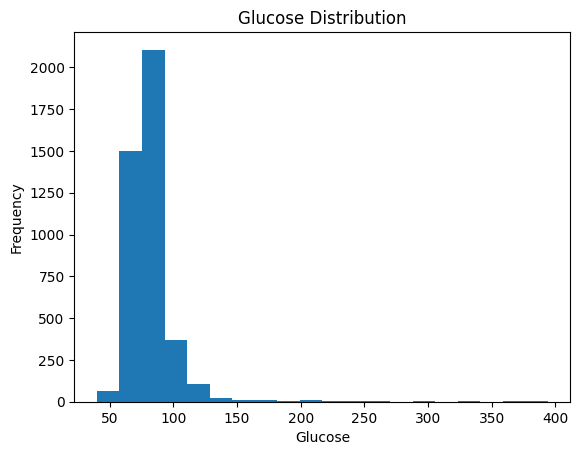

In [ ]:
plt.hist(df['glucose'], bins=20)
plt.title('Glucose Distribution')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower = df['glucose'].quantile(0.05)
upper = df['glucose'].quantile(0.95)

df_filtered = df[(df['glucose'] >= lower) & (df['glucose'] <= upper)]

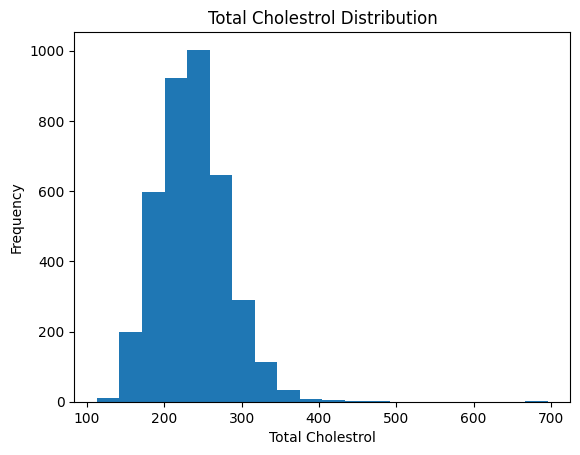

In [ ]:
plt.hist(df_filtered['totChol'], bins=20)
plt.title('Total Cholestrol Distribution')
plt.xlabel('Total Cholestrol')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower2 = df['totChol'].quantile(0.05)
upper2 = df['totChol'].quantile(0.95)

df_filtered2 = df[(df['totChol'] >= lower2) & (df['totChol'] <= upper2)]

## Training Our Model

In [ ]:
x= df_filtered2.drop(['TenYearCHD'], axis= 1)
y= df_filtered2['TenYearCHD']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, train_size= 0.7, random_state= 31, stratify= y)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(2666, 14)
(1143, 14)


In [ ]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
accuracy= model.score(x_test, y_test)
accuracy

0.8538932633420823

## Evaluating our model performence

In [ ]:
print(f"Accuracy of the model is: {(accuracy * 100):.2f}%")

Accuracy of the model is: 85.39%


In [ ]:
y_predicted= model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       972
           1       0.75      0.04      0.07       171

    accuracy                           0.85      1143
   macro avg       0.80      0.52      0.49      1143
weighted avg       0.84      0.85      0.79      1143



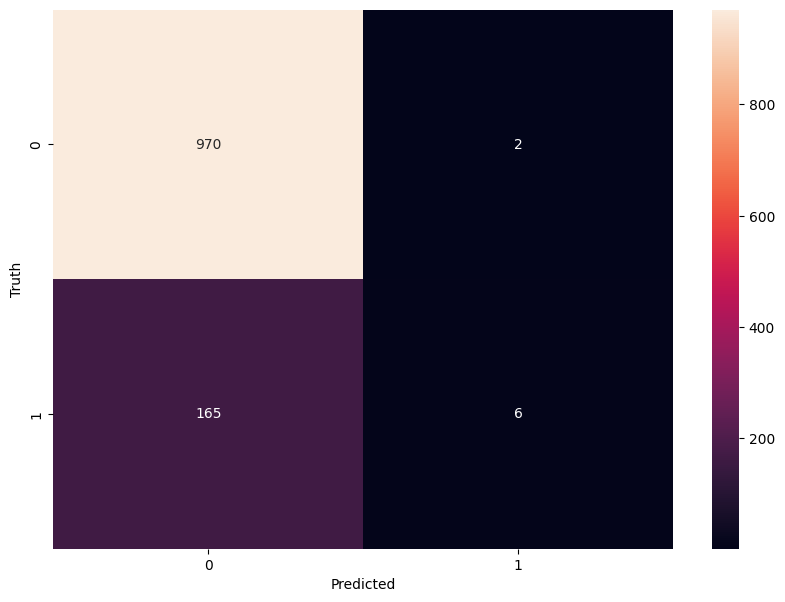

In [ ]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test, y_predicted)
plt.figure(figsize= (10, 7))
sns.heatmap(cm, annot= True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()